In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
#Importação dos Datasets
bolsa_valores = pd.read_csv('/content/drive/MyDrive/notebooks/Analise-de-Preco-main/dados/IBOV.csv')
dollar = pd.read_csv('/content/drive/MyDrive/notebooks/Analise-de-Preco-main/dados/USD_BRL.csv')

In [121]:
bolsa_valores

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-21,98283.00000,98283.000000,95820.00000,96991.000000,96991.000000,9738000.0
1,2020-09-22,96995.00000,97684.000000,96390.00000,97294.000000,97294.000000,7281300.0
2,2020-09-23,97294.00000,97389.000000,95728.00000,95735.000000,95735.000000,8830700.0
3,2020-09-24,95735.00000,97955.000000,95653.00000,97012.000000,97012.000000,9331000.0
4,2020-09-25,97011.00000,97012.000000,95632.00000,96999.000000,96999.000000,7351100.0
...,...,...,...,...,...,...,...
242,2021-09-15,116191.00000,116312.000000,114741.00000,115063.000000,115063.000000,9456800.0
243,2021-09-16,115062.00000,115062.000000,113395.00000,113794.000000,113794.000000,10685500.0
244,2021-09-17,113794.00000,113794.000000,111157.00000,111439.000000,111439.000000,14827600.0
245,2021-09-20,111435.00000,111435.000000,107520.00000,108844.000000,108844.000000,11500200.0


In [122]:
dollar

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-21,5.3965,5.4947,5.385089,5.3898,5.3898,0
1,2020-09-22,5.4130,5.4721,5.381000,5.4126,5.4126,0
2,2020-09-23,5.4705,5.5568,5.467055,5.4699,5.4699,0
3,2020-09-24,5.5921,5.6212,5.529300,5.5924,5.5924,0
4,2020-09-25,5.5084,5.5860,5.506018,5.5084,5.5084,0
...,...,...,...,...,...,...,...
257,2021-09-15,5.2386,5.2694,5.192595,5.2389,5.2389,0
258,2021-09-16,5.2217,5.2766,5.219645,5.2217,5.2217,0
259,2021-09-17,5.2568,5.3448,5.252091,5.2568,5.2568,0
260,2021-09-20,5.2896,5.3437,5.281905,5.2897,5.2897,0


## **Pegando apenas a data e valor de fechamento do Dollar do ano de 2021**

In [133]:
colunas = ['Date', 'Close']
dados_dollar = dollar.filter(colunas)
dados_dollar['Date'] = pd.to_datetime(dados_dollar['Date'])

filtro = (dados_dollar['Date']>='2021-01-01')

dados_dollar_2021 = dados_dollar[filtro]
dados_dollar_2021

,Date,Close
74,2021-01-01,5.1921
75,2021-01-04,5.1919
76,2021-01-05,5.2953
77,2021-01-06,5.2841
78,2021-01-07,5.3129
...,...,...
257,2021-09-15,5.2389
258,2021-09-16,5.2217
259,2021-09-17,5.2568
260,2021-09-20,5.2897


## **Pegando apenas a data e valor de fechamento da IBOVESPA do ano de 2021**

In [131]:
dados_bolsa_valores = bolsa_valores.filter(colunas)
dados_bolsa_valores['Date'] = pd.to_datetime(dados_bolsa_valores['Date'])

filtro = (dados_bolsa_valores['Date']>='2021-01-01')

dados_bolsa_valores_2021 = dados_bolsa_valores[filtro]
dados_bolsa_valores_2021

,Date,Close
68,2021-01-04,118558.000000
69,2021-01-05,119223.000000
70,2021-01-06,119851.000000
71,2021-01-07,121956.000000
72,2021-01-08,125077.000000
...,...,...
242,2021-09-15,115063.000000
243,2021-09-16,113794.000000
244,2021-09-17,111439.000000
245,2021-09-20,108844.000000


## **Agrupando e pegando a média dos valores do Dóllar por mês**

In [136]:
dados_dollar_mes = dados_dollar_2021.groupby(dados_dollar_2021['Date'].dt.strftime('%B'))['Close'].mean()
dados_dollar_mes


Date
April        5.574136
August       5.252873
February     5.402634
January      5.338947
July         5.151366
June         5.035377
March        5.640775
May          5.305892
September    5.219927
Name: Close, dtype: float64

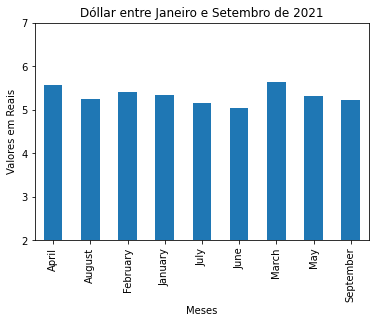

In [156]:
dados_dollar_mes.plot(kind='bar')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,2,7))

plt.title("Dóllar entre Janeiro e Setembro de 2021")
plt.xlabel("Meses")
plt.ylabel("Valores em Reais")

plt.show()


## **Agrupando e pegando a média dos valores da Bolsa de Valores por mês**

In [135]:
dados_bolsa_valores_mes = dados_bolsa_valores_2021.groupby(dados_bolsa_valores_2021['Date'].dt.strftime('%B'))['Close'].mean()
dados_bolsa_valores_mes

Date
April        119249.450000
August       120312.636364
February     117292.823529
January      120126.210526
July         126030.952381
June         128989.952381
March        113870.826087
May          122219.714286
September    114714.224888
Name: Close, dtype: float64

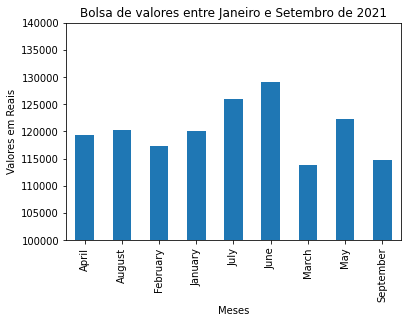

In [157]:
dados_bolsa_valores_mes.plot(kind='bar')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,100000,140000))
plt.title("Bolsa de valores entre Janeiro e Setembro de 2021")
plt.xlabel("Meses")
plt.ylabel("Valores em Reais")
plt.show()

## **Unindo os dados das tabelas**

In [166]:
dados_dollar_bolsa_valores = pd.concat([dados_bolsa_valores_mes, dados_dollar_mes], axis=1)
dados_dollar_bolsa_valores.columns = ['Bolsa de Valores', 'Dollar']
dados_dollar_bolsa_valores

,Bolsa de Valores,Dollar
Date,,
April,119249.450000,5.574136
August,120312.636364,5.252873
February,117292.823529,5.402634
January,120126.210526,5.338947
July,126030.952381,5.151366
June,128989.952381,5.035377
March,113870.826087,5.640775
May,122219.714286,5.305892
September,114714.224888,5.219927


## **Geração do Gráfico de disperção para Análise de Relação entre Ativos por mês**

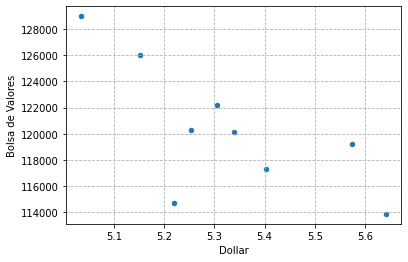

In [191]:
dados_dollar_bolsa_valores.plot(x='Dollar', y='Bolsa de Valores', kind='scatter', grid=True)
plt.grid(axis='both', ls='--')
plt.show()

## ****